1. Linear regression prediction and confidence interval:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

1.1. Data:

study = an array that contains the hours of study. This is the explanatory variable.

score = an array that contains the test scores. This is the response variable.

In [2]:
study = np.array([ 3, 4.5, 6, 1.2, 2, 6.9, 6.7, 5.5])
score = np.array([ 88, 85, 90, 80, 81, 92, 95, 90])
n = study.size

1.2. Training:

In [3]:
# Instantiate a linear regression object.
lm = LinearRegression()

In [4]:
# Train.
lm.fit(study.reshape(-1,1), score.reshape(-1,1))

LinearRegression()

In [5]:
# Get the parameters.
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
print(b0)
print(b1)

77.68466977583873
2.2213028433879947


In [6]:
# Calculate the in-sample RMSE.
predScore = lm.predict(study.reshape(-1,1))
mse = metrics.mean_squared_error(score, predScore)
rmse=np.sqrt(mse)
np.round(rmse,2)

np.float64(1.93)

1.3. confidence interval and visualization:

In [7]:
# We define here the function that calculates standard error.
# Refer to the formula given in the lecture note.
def StdError(x_star, x_vec, mse, n):
    x_mean = np.mean(x_vec)
    return (np.sqrt(mse*(1/n+(x_star-x_mean)**2/np.sum((x_vec-x_mean)**2))))

In [8]:
# y_hat : the predicted y.
# y_low : lower bound of the confidence interval (95%).
# y_up : upper bound of the confidence interval (95%).
x_star = np.linspace(1,9,10)
y_hat = b0 + b1*x_star
y_low = y_hat - st.t.ppf(0.975,n-2)*StdError(x_star,study,mse,n)
y_up = y_hat + st.t.ppf(0.975,n-2)*StdError(x_star,study,mse,n)

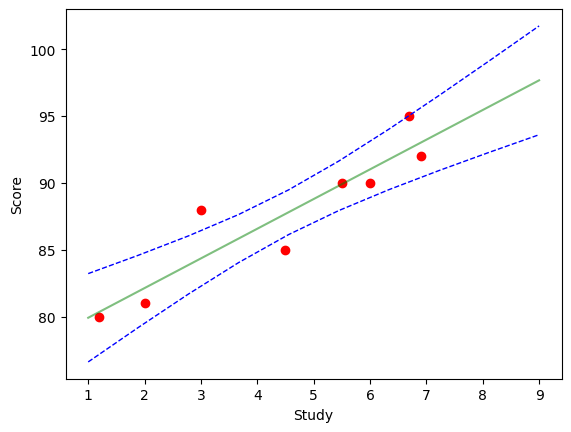

In [9]:
# Now, disaply.
plt.scatter(study, score, c='red')
plt.plot(x_star,y_low,c = 'blue',linestyle='--',linewidth=1)
plt.plot(x_star,y_hat,c = 'green',linewidth = 1.5, alpha=0.5)
plt.plot(x_star,y_up,c = 'blue',linestyle='--',linewidth=1)
plt.xlabel('Study')
plt.ylabel('Score')
plt.show()